# Some Statistics to Gain Some Insights

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple

def smooth(y, radius=200, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

def plot(rewards):
    # clear_output(True)
    x=np.arange(rewards.shape[0])
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.plot(x, smooth(rewards))
    plt.plot(x, rewards, alpha=0.7)
    plt.show()
    plt.clf()  
    plt.close()

In [4]:
import json
filename = "./rl.json"
with open(filename, "r") as read_file:
        general_rl_confs = json.load(read_file)  # hyperparameters for rl training

filename = "../mlp/mlp_rl_train.json"
with open(filename, "r") as read_file:
        rl_confs = json.load(read_file)  # hyperparameters for rl training


## CartPole-v1

In [50]:
EnvName = 'CartPole-v1' 

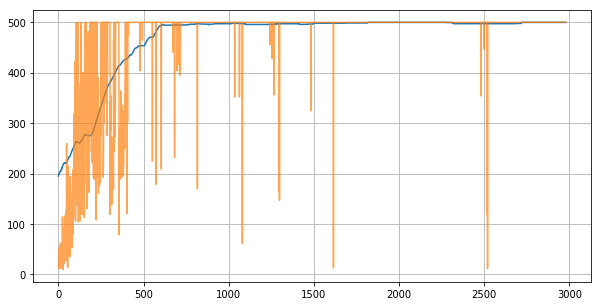

In [51]:
# learning curve
log_path = '../'+rl_confs[EnvName]["train_confs"]["log_path"]
rewards = np.load(log_path+'.npy')
plot(rewards)

In [79]:
# state statistics: mean and std for states encountered
data_path_prefix = '../'+general_rl_confs["data_collect_confs"]["data_path"]+EnvName.split("-")[0].lower()
states = np.load(data_path_prefix+'/greedy_state.npy')
print(states[1000:1010])
print('state data shape: ', states.shape)
mean = np.mean(states, axis=0)
std = np.std(states, axis=0)
print('state data mean: {} and std: {}'.format(mean, std))
state_info = {'env_name': EnvName,
             'mean': mean,
             'std': std}
with open(data_path_prefix+'/state_info.pkl', 'wb') as f:
    pickle.dump(state_info, f)

[[-0.01169291 -0.00718749 -0.01653909  0.00497331]
 [-0.01183666 -0.20206839 -0.01643963  0.2923924 ]
 [-0.01587803 -0.39695213 -0.01059178  0.57984548]
 [-0.02381707 -0.59192407  0.00100513  0.86917306]
 [-0.03565556 -0.39681581  0.01838859  0.57680632]
 [-0.04359187 -0.59219062  0.02992472  0.87522493]
 [-0.05543568 -0.39748797  0.04742922  0.59209826]
 [-0.06338544 -0.20306096  0.05927118  0.31472468]
 [-0.06744666 -0.39897493  0.06556567  0.62549512]
 [-0.07542616 -0.20482657  0.07807558  0.35416082]]
state data shape:  (1450500, 4)
state data mean: [ 6.86851844e-01  8.76015026e-02  2.45632109e-06 -5.83751407e-06] and std: [0.26297849 0.18775287 0.01788451 0.20956907]


## LunarLander-v2

In [81]:
EnvName = 'LunarLander-v2'

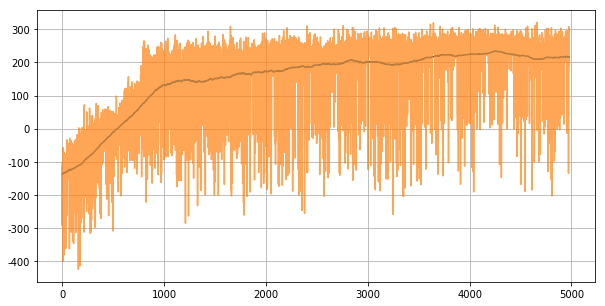

In [47]:
# learning curve
log_path = '../'+rl_confs[EnvName]["train_confs"]["log_path"]
rewards = np.load(log_path+'.npy')
plot(rewards)

In [82]:
# state statistics: mean and std for states encountered
import pickle
data_path_prefix = '../'+general_rl_confs["data_collect_confs"]["data_path"]+EnvName.split("-")[0].lower()
states = np.load(data_path_prefix+'/greedy_state.npy')
print('state data shape: ', states.shape)
mean = np.mean(states, axis=0)
std = np.std(states, axis=0)
print('state data mean: {} and std: {}'.format(mean, std))
state_info = {'env_name': EnvName,
             'mean': mean,
             'std': std}
with open(data_path_prefix+'/state_info.pkl', 'wb') as f:
    pickle.dump(state_info, f)

state data shape:  (2048608, 8)
state data mean: [-0.10747622  0.20303167 -0.03579763 -0.08802626  0.00266608  0.0007375
  0.38794148  0.29506376] and std: [0.31191328 0.3447302  0.17022705 0.16021654 0.06994157 0.05709264
 0.4899489  0.46029896]


In [83]:
with open(data_path_prefix+'/state_info.pkl', 'rb') as f:
    s=pickle.load(f)
print(s.get('mean'))


[-0.10747622  0.20303167 -0.03579763 -0.08802626  0.00266608  0.0007375
  0.38794148  0.29506376]


## MountainCar-v0

In [5]:
EnvName = 'MountainCar-v0'

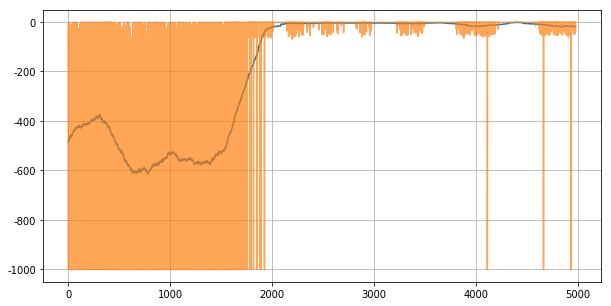

In [8]:
# learning curve
log_path = '../'+rl_confs[EnvName]["train_confs"]["log_path"]
rewards = np.load(log_path+'.npy')
plot(rewards)

In [10]:
# state statistics: mean and std for states encountered
import pickle
data_path_prefix = '../'+general_rl_confs["data_collect_confs"]["data_path"]+EnvName.split("-")[0].lower()
states = np.load(data_path_prefix+'/greedy_state.npy')
print('state data shape: ', states.shape)
mean = np.mean(states, axis=0)
std = np.std(states, axis=0)
print('state data mean: {} and std: {}'.format(mean, std))
state_info = {'env_name': EnvName,
             'mean': mean,
             'std': std}
with open(data_path_prefix+'/state_info.pkl', 'wb') as f:
    pickle.dump(state_info, f)

state data shape:  (487168, 2)
state data mean: [-0.40410234  0.00295303] and std: [0.21420211 0.01521328]


In [11]:
with open(data_path_prefix+'/state_info.pkl', 'rb') as f:
    s=pickle.load(f)
print(s.get('mean'))

[-0.40410234  0.00295303]
